In [94]:
import pandas as pd
from keras import utils
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
import cv2

# Section 1 : preprocessing


## Section 1.1 : function to preprocess data.

in this function we process an image so its like minist dataset. 

In [95]:
def proprocess(image,is_single_digit = True):
    
        image = cv2.GaussianBlur(image, (1, 1), 0)
        image = cv2.medianBlur(image, 3)
        
        if is_single_digit:
                image = cv2.resize(image, (28,28))
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        threshold_value = 200
        replacement_value = 0
        mask = grayscale_image < threshold_value
        
        grayscale_image[mask] = replacement_value
        
        size = (2, 2)
        shape = cv2.MORPH_RECT
        kernel = cv2.getStructuringElement(shape, size)
        min_image = cv2.erode(grayscale_image, kernel)
        
        
        min_image =  255 - min_image
        
        
        return min_image
        

## Section 1.2 : prepare train data



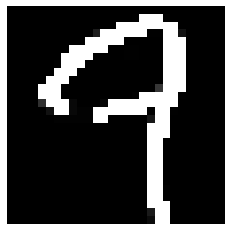

In [96]:
digits_datafram = pd.DataFrame()
label_dataframe = pd.DataFrame()
for i in range (0,10):
    for j in range(1,22):
        image_file_name = str(i) + "." + str(j) + ".jpg"
        image = cv2.imread(image_file_name)
        process_image = proprocess(image)
        flatten_image = process_image.flatten()
        
        
        
        arr_df = pd.DataFrame(flatten_image.reshape(1, -1))

        digits_datafram = pd.concat([digits_datafram, arr_df], ignore_index=True)
        
        
        value = i

        value_df = pd.DataFrame([value])

        label_dataframe = pd.concat([label_dataframe, value_df], ignore_index=True)
        

digits_datafram.to_csv('digits.csv', index=False)
label_dataframe.to_csv('labels.csv' , index=False)
sample_image = cv2.resize(process_image, (28,28))
plt.imshow(sample_image, cmap='gray')
plt.axis('off')
plt.show()

## Section 1.3 : prepare test data


In [97]:
digits_test_datafram = pd.DataFrame()
label_test_dataframe = pd.DataFrame()
for i in range (0,10):
    for j in range(22,24):
        image_file_name = str(i) + "." + str(j) + ".jpg"
        image = cv2.imread(image_file_name)
        process_image = proprocess(image)

        flatten_image = process_image.flatten()

        arr_df = pd.DataFrame(flatten_image.reshape(1, -1))

        digits_test_datafram = pd.concat([digits_test_datafram, arr_df], ignore_index=True)
        
        
        value = i

        value_df = pd.DataFrame([value])

        label_test_dataframe = pd.concat([label_test_dataframe, value_df], ignore_index=True)
        
        
            
        print(image_file_name)



digits_test_datafram.to_csv('digits_test.csv', index=False)
label_test_dataframe.to_csv('labels_test.csv' , index=False)

0.22.jpg
0.23.jpg
1.22.jpg
1.23.jpg
2.22.jpg
2.23.jpg
3.22.jpg
3.23.jpg
4.22.jpg
4.23.jpg
5.22.jpg
5.23.jpg
6.22.jpg
6.23.jpg
7.22.jpg
7.23.jpg
8.22.jpg
8.23.jpg
9.22.jpg
9.23.jpg


## Section 1.4 : read the data.

In [98]:
X_train = pd.read_csv("digits.csv").values
Y_train = pd.read_csv("labels.csv").values
Y_train = utils.to_categorical(Y_train)
X_test = pd.read_csv("digits_test.csv").values
Y_test = pd.read_csv("labels_test.csv").values

# section 2 : ANN

## section 2.1 : prepare ANN dataset.
first we prepared data to to that we spilit the train set to a train set and a validation set. then we normalize and reshape the data

In [99]:
ANN_X_train = X_train.copy()
ANN_Y_train = Y_train.copy()
ANN_X_test = X_test.copy()
ANN_Y_test = Y_test.copy()


ANN_X_train, ANN_X_val, ANN_Y_train, ANN_Y_val = train_test_split(ANN_X_train, ANN_Y_train, test_size=0.2, random_state=42)

ANN_X_train = ANN_X_train.astype('float32') / 255
ANN_X_val = ANN_X_val.astype('float32') / 255
ANN_X_train = ANN_X_train.reshape((-1, 28, 28, 1))  
ANN_X_val = ANN_X_val.reshape((-1, 28, 28, 1))   
ANN_X_test = ANN_X_test.astype('float32') / 255
ANN_X_test = ANN_X_test.reshape((-1, 28, 28, 1))  

## section 2.2 : ANN model decription.
here we describe the ANN model we use to train the model. here is a break down of the layers :


1. **Sequential Model**: The model is a Sequential model. This is a linear stack of layers that you can create by passing a list of layer instances to the constructor.

2. **First Layer - Dense (128, activation='relu', input_shape=(28*28,))**: This is a densely connected (also known as fully connected) layer with 32 neurons, and 'relu' activation function. The input shape is (28*28,), which is typically for flattened 28x28 pixel images.


3. **second Layer - Dense (10, activation='softmax')**: This is the output layer, which is a densely connected layer with 10 neurons (which is typically used for a 10-class classification), and 'softmax' activation function. The softmax function outputs a vector that represents the probability distribution of a list of potential outcomes.


In [100]:
ANN_model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(10, activation='softmax')
])
ANN_model.summary(line_length = 100)

Model: "sequential_9"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 flatten_9 (Flatten)                         (None, 784)                             0              
                                                                                                    
 dense_36 (Dense)                            (None, 128)                             100480         
                                                                                                    
 dense_37 (Dense)                            (None, 10)                              1290           
                                                                                                    
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
__________________________________________________________________________________________________

## section 2.3 : compile and fit the ANN model.
here we use adam optimizer and categorical_crossentropy for loss function to compile the model we use 25 epochs to minimize the loss for validation function.

In [101]:

ANN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = ANN_model.fit(
    ANN_X_train, ANN_Y_train,
    epochs=50,
    verbose=2,
    validation_data=(ANN_X_val, ANN_Y_val),
)



Epoch 1/50


6/6 - 0s - loss: 4.3973 - accuracy: 0.1429 - val_loss: 4.0074 - val_accuracy: 0.3333 - 429ms/epoch - 72ms/step
Epoch 2/50
6/6 - 0s - loss: 3.6357 - accuracy: 0.5357 - val_loss: 3.5948 - val_accuracy: 0.5000 - 43ms/epoch - 7ms/step
Epoch 3/50
6/6 - 0s - loss: 3.0977 - accuracy: 0.7500 - val_loss: 3.2695 - val_accuracy: 0.5238 - 39ms/epoch - 6ms/step
Epoch 4/50
6/6 - 0s - loss: 2.6646 - accuracy: 0.8095 - val_loss: 3.0038 - val_accuracy: 0.5714 - 35ms/epoch - 6ms/step
Epoch 5/50
6/6 - 0s - loss: 2.3249 - accuracy: 0.8393 - val_loss: 2.8119 - val_accuracy: 0.5238 - 42ms/epoch - 7ms/step
Epoch 6/50
6/6 - 0s - loss: 2.0661 - accuracy: 0.8750 - val_loss: 2.6442 - val_accuracy: 0.5000 - 35ms/epoch - 6ms/step
Epoch 7/50
6/6 - 0s - loss: 1.8414 - accuracy: 0.8929 - val_loss: 2.5206 - val_accuracy: 0.5714 - 38ms/epoch - 6ms/step
Epoch 8/50
6/6 - 0s - loss: 1.6696 - accuracy: 0.9048 - val_loss: 2.3875 - val_accuracy: 0.5952 - 33ms/epoch - 5ms/step
Epoch 9/50
6/6 - 0s - loss: 1.5220 - accuracy: 0.

## section 2.4 : visulaize the history of loss and accurcy of train and validation set.
in this section we use the matplotlib libary to plot the loss and accuracy of both train and model set.

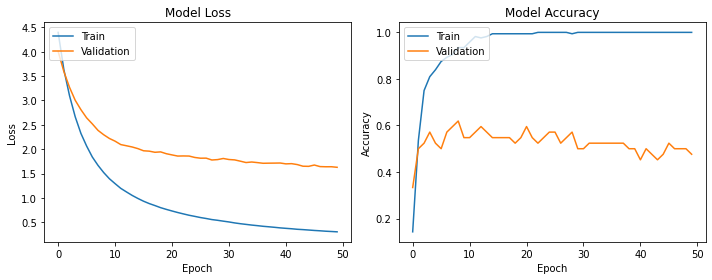

In [102]:

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)  
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)  
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout() 
plt.show()

# section 2.5 : Test.
as we can see the loss and accuracy of the validation set is very low which is good and now we can verify that the model is good by putting it to test.

1/1 [==============================] - 0s 42ms/step
0
1/1 [==============================] - 0s 17ms/step
0
1/1 [==============================] - 0s 17ms/step
1
1/1 [==============================] - 0s 15ms/step
1
1/1 [==============================] - 0s 15ms/step
2
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 15ms/step
3
1/1 [==============================] - 0s 14ms/step
2
1/1 [==============================] - 0s 14ms/step
4
1/1 [==============================] - 0s 15ms/step
3
1/1 [==============================] - 0s 15ms/step
0
1/1 [==============================] - 0s 15ms/step
5
1/1 [==============================] - 0s 15ms/step
6
1/1 [==============================] - 0s 15ms/step
9
1/1 [==============================] - 0s 14ms/step
7
1/1 [==============================] - 0s 15ms/step
7
1/1 [==============================] - 0s 15ms/step
8
1/1 [==============================] - 0s 15ms/step
8
1/1 [=======================

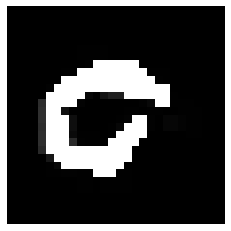

In [103]:

correct = 0
for i,test_sample in enumerate (ANN_X_test):
    predictions = ANN_model.predict(np.expand_dims(test_sample, axis=0))
    Y_test = Y_test.reshape(1,20)
    print(np.argmax(predictions[0]))
    if np.argmax(predictions[0]) == Y_test[0][i]:
        correct +=1       
print(f"accuracy : {correct} / 20")
       
test_sample = ANN_X_test[1]

image = np.array(test_sample).reshape(28, 28)


plt.imshow(image , cmap="gray")
plt.axis("off")


predictions = ANN_model.predict(np.expand_dims(test_sample, axis=0))

print(np.argmax(predictions[0])) 

# section 3 : CNN

## section 3.1 : prepare CNN dataset.
first we prepared data to to that we spilit the train set to a train set and a validation set. then we normalize and reshape the data

In [104]:
CNN_X_train = X_train.copy()
CNN_Y_train = Y_train.copy()
CNN_X_test = X_test.copy()
CNN_Y_test = Y_test.copy()

CNN_X_train, CNN_X_val, CNN_Y_train, CNN_Y_val = train_test_split(CNN_X_train, CNN_Y_train, test_size=0.2, random_state=42)

CNN_X_train = CNN_X_train.astype('float32') / 255
CNN_X_val = CNN_X_val.astype('float32') / 255
CNN_X_train = CNN_X_train.reshape((-1, 28, 28, 1))  
CNN_X_val = CNN_X_val.reshape((-1, 28, 28, 1))    
CNN_X_test = X_test.astype('float32') / 255
CNN_X_test = X_test.reshape((-1, 28, 28, 1))        

## section 3.2 : model decription.
here we describe the CNN model we use to train the model. here is a break down of the layers :
1. **Sequential Model**: The model is a Sequential model. This is a linear stack of layers that you can create by passing a list of layer instances to the constructor.

2. **First Layer - Conv2D (filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=tf.keras.regularizers.l2(0.01),padding='same')**: This is a 2D convolution layer (spatial convolution over images) with 32 filters, a kernel size of 3x3, 'relu' activation function, and L2 regularization with a factor of 0.01. The input shape is (28, 28, 1), which is typically for 28x28 pixel grayscale images. The padding is set to 'same' which means the output has the same width and height as the original input.

3. **Second Layer - Conv2D (filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01),padding='same')**: This is another 2D convolution layer with the same parameters as the first layer.

4. **Third Layer - MaxPooling2D (pool_size=(2, 2))**: This is a max pooling operation for 2D spatial data. The pool size is 2x2, which will reduce the spatial dimensions (width, height) of the input by half.

5. **Fourth and Fifth Layers**: These are similar to the first three layers but with different number of filters in the Conv2D layer.

6. **Sixth Layer - MaxPooling2D (pool_size=(2, 2))**: This is another max pooling layer with the same parameters as the third layer.

7. **Seventh and Eighth Layers**: These are similar to the first three layers but with different number of filters in the Conv2D layer.

9. **Ninth Layer - MaxPooling2D (pool_size=(2, 2))**: This is another max pooling layer with the same parameters as the third layer.

10. **Tenth Layer - Dropout (0.2)**: This is a Dropout layer, which randomly sets a fraction (0.2 in this case) of the input units to 0 at each update during training, which helps prevent overfitting.

11. **Eleventh Layer - Flatten()**: This layer flattens the input. It does not affect the batch size. It's used when transitioning between convolutional layers and fully connected layers.

12. **Twelfth Layer - Dense (128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))**: This is a densely connected (also known as fully connected) layer with 128 neurons, and 'relu' activation function. It also has L2 regularization with a factor of 0.01.

13. **Thirteenth Layer - Dense (10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01))**: This is the output layer, which is a densely connected layer with 10 neurons (which is typically used for a 10-class classification), and 'softmax' activation function. The softmax function outputs a vector that represents the probability distribution of a list of potential outcomes. It also has L2 regularization with a factor of 0.01.


In [105]:

CNN_model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=tf.keras.regularizers.l2(0.01),padding='same'), 
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01),padding='same'), 
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01),padding='same'), 
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01),padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01),padding='same'), 
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01),padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Dropout(0.2),
    Flatten(),
    
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    
    Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01))  
])
CNN_model.summary(line_length = 100)


Model: "sequential_10"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 conv2d_18 (Conv2D)                          (None, 28, 28, 32)                      320            
                                                                                                    
 conv2d_19 (Conv2D)                          (None, 28, 28, 32)                      9248           
                                                                                                    
 max_pooling2d_9 (MaxPooling2D)              (None, 14, 14, 32)                      0              
                                                                                                    
 conv2d_20 (Conv2D)                          (None, 14, 14, 32)                      9248           
                                                                    

## section 3.3 : compile and fit the model.
here we use adam optimizer and categorical_crossentropy for loss function to compile the model we use 100 epochs to minimize the loss for validation function.

In [106]:
CNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = CNN_model.fit(
    CNN_X_train, CNN_Y_train,
    epochs=100,
    verbose=2,
    validation_data=(CNN_X_val, CNN_Y_val),
)


Epoch 1/100


6/6 - 1s - loss: 6.4725 - accuracy: 0.1310 - val_loss: 5.8965 - val_accuracy: 0.1429 - 1s/epoch - 174ms/step
Epoch 2/100
6/6 - 0s - loss: 5.6111 - accuracy: 0.1548 - val_loss: 5.1216 - val_accuracy: 0.3095 - 391ms/epoch - 65ms/step
Epoch 3/100
6/6 - 0s - loss: 4.8900 - accuracy: 0.2381 - val_loss: 4.4439 - val_accuracy: 0.1190 - 394ms/epoch - 66ms/step
Epoch 4/100
6/6 - 0s - loss: 4.1917 - accuracy: 0.2917 - val_loss: 3.5713 - val_accuracy: 0.4048 - 408ms/epoch - 68ms/step
Epoch 5/100
6/6 - 0s - loss: 3.3953 - accuracy: 0.4583 - val_loss: 3.3296 - val_accuracy: 0.3333 - 386ms/epoch - 64ms/step
Epoch 6/100
6/6 - 0s - loss: 3.0104 - accuracy: 0.5179 - val_loss: 2.8370 - val_accuracy: 0.5000 - 413ms/epoch - 69ms/step
Epoch 7/100
6/6 - 0s - loss: 2.5597 - accuracy: 0.6250 - val_loss: 2.4849 - val_accuracy: 0.5476 - 385ms/epoch - 64ms/step
Epoch 8/100
6/6 - 0s - loss: 2.1309 - accuracy: 0.7083 - val_loss: 2.7179 - val_accuracy: 0.4762 - 397ms/epoch - 66ms/step
Epoch 9/100
6/6 - 0s - loss: 2

# section 3.4 : visulaize the history of loss and accurcy of train and validation set.
in this section we use the matplotlib libary to plot the loss and accuracy of both train and model set.

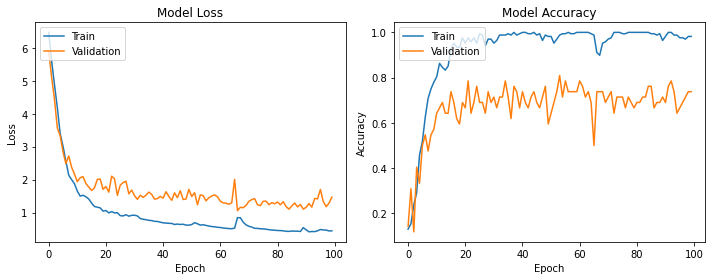

In [107]:


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)  
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)  
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout() 
plt.show()



# section 3.5 : Test.
as we can see the loss and accuracy of the validation set is very low which is good and now we can verify that the model is good by putting it to test. 
if its good we can be sure that overfitting has not happend.

1/1 [==============================] - 0s 73ms/step
0
1/1 [==============================] - 0s 16ms/step
0
1/1 [==============================] - 0s 18ms/step
1
1/1 [==============================] - 0s 16ms/step
1
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 15ms/step
2
1/1 [==============================] - 0s 28ms/step
3
1/1 [==============================] - 0s 18ms/step
3
1/1 [==============================] - 0s 17ms/step
4
1/1 [==============================] - 0s 16ms/step
4
1/1 [==============================] - 0s 16ms/step
0
1/1 [==============================] - 0s 17ms/step
0
1/1 [==============================] - 0s 16ms/step
6
1/1 [==============================] - 0s 18ms/step
6
1/1 [==============================] - 0s 17ms/step
7
1/1 [==============================] - 0s 16ms/step
7
1/1 [==============================] - 0s 16ms/step
8
1/1 [==============================] - 0s 18ms/step
8
1/1 [=======================

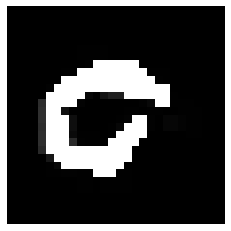

In [108]:
correct = 0

for i,test_sample in enumerate (CNN_X_test):
    predictions = CNN_model.predict(np.expand_dims(test_sample, axis=0))
    Y_test = Y_test.reshape(1,20)
    print(np.argmax(predictions[0]))
    if np.argmax(predictions[0]) == Y_test[0][i]:
        correct +=1
    
        
print(f"accuracy rate : {correct} / 20" )
    
    
test_sample = CNN_X_test[1]

image = np.array(test_sample).reshape(28, 28)


plt.imshow(image , cmap="gray")
plt.axis("off")


predictions = CNN_model.predict(np.expand_dims(test_sample, axis=0))



print(np.argmax(predictions[0])) 

# section 4 : ANN with data augmentation.

## section 4.1 : prepare ANN augmentation dataset.
first we prepared data to to that we spilit the train set to a train set and a validation set. then we normalize and reshape the data

In [109]:
ANN_AUG_X_train = X_train.copy()
ANN_AUG_Y_train = Y_train.copy()
ANN_AUG_X_test = X_test.copy()
ANN_AUG_Y_test = Y_test.copy()


ANN_AUG_X_train, ANN_AUG_X_val, ANN_AUG_Y_train, ANN_AUG_Y_val = train_test_split(ANN_AUG_X_train, ANN_AUG_Y_train, test_size=0.3, random_state=42)

ANN_AUG_X_train = ANN_AUG_X_train.astype('float32') / 255
ANN_AUG_X_val = ANN_AUG_X_val.astype('float32') / 255
ANN_AUG_X_train = ANN_AUG_X_train.reshape((-1, 28, 28, 1))  
ANN_AUG_X_val = ANN_AUG_X_val.reshape((-1, 28, 28, 1))   
ANN_AUG_X_test = ANN_AUG_X_test.astype('float32') / 255
ANN_AUG_X_test = ANN_AUG_X_test.reshape((-1, 28, 28, 1))  

## section 4.2 : image generation for augmentation.

In [110]:
data_gen = ImageDataGenerator(
    rotation_range=3,
    width_shift_range=0.7,
    height_shift_range=0.7,
    # shear_range=0.2,
    # zoom_range=0.1,
    # horizontal_flip=True,
    fill_mode='nearest'
)

## section 4.3 : complex ANN Model
the previos model results in underfitting so we can define a new , more complex model for ANN.

In [111]:
complex_ANN_model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(2048, activation='relu',),
    Dropout(0.4),
    Dense(1024, activation='relu', ),
    Dropout(0.4),
    Dense(512, activation='relu' ),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu',),
    Dropout(0.4),
    Dense(64, activation='relu',),
    Dropout(0.4),
    Dense(32, activation='relu', ),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

complex_ANN_model.summary(line_length = 100)


Model: "sequential_11"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 flatten_11 (Flatten)                        (None, 784)                             0              
                                                                                                    
 dense_40 (Dense)                            (None, 2048)                            1607680        
                                                                                                    
 dropout_25 (Dropout)                        (None, 2048)                            0              
                                                                                                    
 dense_41 (Dense)                            (None, 1024)                            2098176        
                                                                    

## section 4.4 : compile and fit the model.
here we use adam optimizer and categorical_crossentropy for loss function to compile the model we use 130 epochs to minimize the loss for validation function.

In [112]:
complex_ANN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = complex_ANN_model.fit(
    data_gen.flow(ANN_AUG_X_train, ANN_AUG_Y_train ),
    epochs=130,
    verbose=2,
    validation_data=data_gen.flow(ANN_AUG_X_val, ANN_AUG_Y_val),
)

Epoch 1/130


5/5 - 1s - loss: 2.3557 - accuracy: 0.0884 - val_loss: 2.3018 - val_accuracy: 0.1111 - 839ms/epoch - 168ms/step
Epoch 2/130
5/5 - 0s - loss: 2.3491 - accuracy: 0.1361 - val_loss: 2.3104 - val_accuracy: 0.0635 - 238ms/epoch - 48ms/step
Epoch 3/130
5/5 - 0s - loss: 2.3566 - accuracy: 0.0816 - val_loss: 2.3126 - val_accuracy: 0.1111 - 240ms/epoch - 48ms/step
Epoch 4/130
5/5 - 0s - loss: 2.3736 - accuracy: 0.1497 - val_loss: 2.3091 - val_accuracy: 0.0635 - 248ms/epoch - 50ms/step
Epoch 5/130
5/5 - 0s - loss: 2.3500 - accuracy: 0.1156 - val_loss: 2.3071 - val_accuracy: 0.0635 - 263ms/epoch - 53ms/step
Epoch 6/130
5/5 - 0s - loss: 2.3626 - accuracy: 0.0952 - val_loss: 2.3133 - val_accuracy: 0.1111 - 260ms/epoch - 52ms/step
Epoch 7/130
5/5 - 0s - loss: 2.3019 - accuracy: 0.1088 - val_loss: 2.3081 - val_accuracy: 0.0476 - 248ms/epoch - 50ms/step
Epoch 8/130
5/5 - 0s - loss: 2.3250 - accuracy: 0.1020 - val_loss: 2.3078 - val_accuracy: 0.1111 - 243ms/epoch - 49ms/step
Epoch 9/130
5/5 - 0s - loss

# section 4.5 : visulaize the history of loss and accurcy of train and validation set.
in this section we use the matplotlib libary to plot the loss and accuracy of both train and model set.

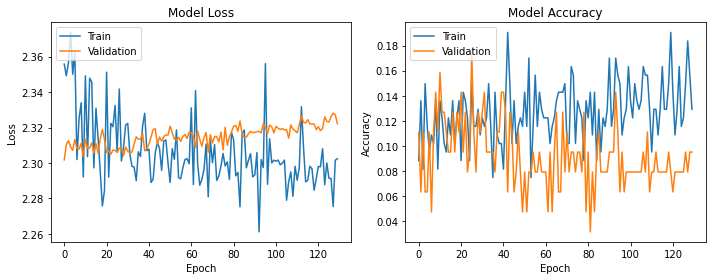

In [113]:

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)  
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)  
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout() 
plt.show()

# section 4.6 : Test.
as we can see the loss and accuracy of the validation set is very low which is good and now we can verify that the model is good by putting it to test. 

1/1 [==============================] - 0s 26ms/step


0
1/1 [==============================] - 0s 16ms/step
0
1/1 [==============================] - 0s 19ms/step
1
1/1 [==============================] - 0s 17ms/step
1
1/1 [==============================] - 0s 17ms/step
2
1/1 [==============================] - 0s 35ms/step
2
1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 19ms/step
2
1/1 [==============================] - 0s 15ms/step
4
1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 16ms/step
0
1/1 [==============================] - 0s 17ms/step
5
1/1 [==============================] - 0s 15ms/step
6
1/1 [==============================] - 0s 16ms/step
9
1/1 [==============================] - 0s 18ms/step
7
1/1 [==============================] - 0s 17ms/step
7
1/1 [==============================] - 0s 16ms/step
8
1/1 [==============================] - 0s 16ms/step
8
1/1 [==============================] - 0s 16ms/step
9
1/1 [=====================

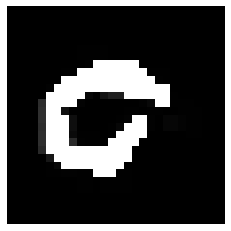

In [114]:

correct = 0
for i,test_sample in enumerate (ANN_AUG_X_test):
    predictions = ANN_model.predict(np.expand_dims(test_sample, axis=0))
    Y_test = Y_test.reshape(1,20)
    print(np.argmax(predictions[0]))
    if np.argmax(predictions[0]) == Y_test[0][i]:
        correct +=1       
print(f"accuracy :  {correct} / 20")
       
test_sample = ANN_AUG_X_test[1]

image = np.array(test_sample).reshape(28, 28)


plt.imshow(image , cmap="gray")
plt.axis('off')


predictions = ANN_model.predict(np.expand_dims(test_sample, axis=0))

print(np.argmax(predictions[0])) 

# section 5 : CNN with data augmentation.

## section 5.1 : prepare CNN augmentation dataset.
first we prepared data to to that we spilit the train set to a train set and a validation set. then we normalize and reshape the data

In [115]:
CNN_AUG_X_train = X_train.copy()
CNN_AUG_Y_train = Y_train.copy()
CNN_AUG_X_test = X_test.copy()
CNN_AUG_Y_test = Y_test.copy()


CNN_AUG_X_train, CNN_AUG_X_val, CNN_AUG_Y_train, CNN_AUG_Y_val = train_test_split(CNN_AUG_X_train, CNN_AUG_Y_train, test_size=0.3, random_state=42)

CNN_AUG_X_train = CNN_AUG_X_train.astype('float32') / 255
CNN_AUG_X_val = CNN_AUG_X_val.astype('float32') / 255
CNN_AUG_X_train = CNN_AUG_X_train.reshape((-1, 28, 28, 1))  
CNN_AUG_X_val = CNN_AUG_X_val.reshape((-1, 28, 28, 1))   
CNN_AUG_X_test = CNN_AUG_X_test.astype('float32') / 255
CNN_AUG_X_test = CNN_AUG_X_test.reshape((-1, 28, 28, 1))  

## section 5.2 : image generation for augmentation.

In [116]:
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    # horizontal_flip=True,
    # fill_mode='nearest'
)

## section 5.3 : compile and fit the model.
here we use adam optimizer and categorical_crossentropy for loss function to compile the model we use 130 epochs to minimize the loss for validation function.

In [117]:
CNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = CNN_model.fit(
    data_gen.flow(CNN_AUG_X_train, CNN_AUG_Y_train , batch_size=32),
    steps_per_epoch=len(CNN_AUG_X_train) / 32, 
    epochs=100,
    verbose=2,
    validation_data=data_gen.flow(CNN_AUG_X_val, CNN_AUG_Y_val, batch_size=32),
    validation_steps=len(CNN_AUG_X_val) / 32
)

Epoch 1/100


4/4 - 1s - loss: 2.5735 - accuracy: 0.3741 - val_loss: 2.1409 - val_accuracy: 0.3651 - 1s/epoch - 303ms/step
Epoch 2/100
4/4 - 0s - loss: 2.0714 - accuracy: 0.4694 - val_loss: 2.1699 - val_accuracy: 0.3810 - 494ms/epoch - 108ms/step
Epoch 3/100
4/4 - 1s - loss: 1.9700 - accuracy: 0.5306 - val_loss: 2.0873 - val_accuracy: 0.4286 - 524ms/epoch - 114ms/step
Epoch 4/100
4/4 - 0s - loss: 1.8188 - accuracy: 0.5170 - val_loss: 1.8373 - val_accuracy: 0.5079 - 457ms/epoch - 99ms/step
Epoch 5/100
4/4 - 0s - loss: 1.6604 - accuracy: 0.5578 - val_loss: 2.1104 - val_accuracy: 0.4127 - 427ms/epoch - 93ms/step
Epoch 6/100
4/4 - 0s - loss: 1.6219 - accuracy: 0.6327 - val_loss: 1.4759 - val_accuracy: 0.6508 - 410ms/epoch - 89ms/step
Epoch 7/100
4/4 - 0s - loss: 1.4831 - accuracy: 0.6190 - val_loss: 1.5451 - val_accuracy: 0.5714 - 432ms/epoch - 94ms/step
Epoch 8/100
4/4 - 0s - loss: 1.3138 - accuracy: 0.7075 - val_loss: 1.6309 - val_accuracy: 0.5873 - 442ms/epoch - 96ms/step
Epoch 9/100
4/4 - 0s - loss:

# section 5.4 : visulaize the history of loss and accurcy of train and validation set.
in this section we use the matplotlib libary to plot the loss and accuracy of both train and model set.

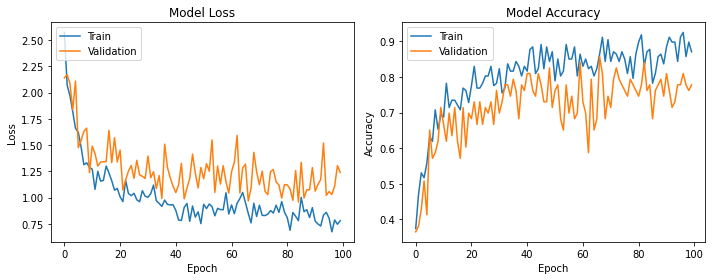

In [118]:

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)  
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)  
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout() 
plt.show()

# section 5.6 : Test.
as we can see the loss and accuracy of the validation set is very low which is good and now we can verify that the model is good by putting it to test. 

1/1 [==============================] - 0s 112ms/step
0
1/1 [==============================] - 0s 16ms/step
0
1/1 [==============================] - 0s 15ms/step
1
1/1 [==============================] - 0s 16ms/step
1
1/1 [==============================] - 0s 17ms/step
2
1/1 [==============================] - 0s 18ms/step
2
1/1 [==============================] - 0s 20ms/step
3
1/1 [==============================] - 0s 21ms/step
3
1/1 [==============================] - 0s 21ms/step
4
1/1 [==============================] - 0s 20ms/step
4
1/1 [==============================] - 0s 20ms/step
5
1/1 [==============================] - 0s 20ms/step
5
1/1 [==============================] - 0s 18ms/step
6
1/1 [==============================] - 0s 17ms/step
6
1/1 [==============================] - 0s 19ms/step
7
1/1 [==============================] - 0s 17ms/step
7
1/1 [==============================] - 0s 16ms/step
5
1/1 [==============================] - 0s 17ms/step
8
1/1 [======================

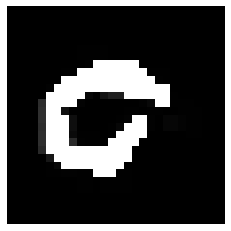

In [119]:

correct = 0
for i,test_sample in enumerate (CNN_AUG_X_test):
    predictions = CNN_model.predict(np.expand_dims(test_sample, axis=0))
    Y_test = Y_test.reshape(1,20)
    print(np.argmax(predictions[0]))
    if np.argmax(predictions[0]) == Y_test[0][i]:
        correct +=1       
print(f"accuracy : {correct} / 20")
       
test_sample = ANN_AUG_X_test[1]

image = np.array(test_sample).reshape(28, 28)


plt.imshow(image , cmap="gray")
plt.axis('off')


predictions = CNN_model.predict(np.expand_dims(test_sample, axis=0))

print(np.argmax(predictions[0])) 

# Section 7 : reading a number

## Section 7.1 : function to get digits.
we first use this function on a processed image. here we use contours to get the bright parts (digits) and sort them left to right then we find the contours that are larger than 80 pixels and padd them after that we resize it to 28 * 28 and use CNN model on it.
the numbers are muliplied by 10 and add we calculate the sum.

In [120]:
def get_digits(image):
    _, binary = cv2.threshold(image, 40, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
    number = 0 

    for contour in contours:
        if cv2.contourArea(contour) >= 80:
            x, y, w, h = cv2.boundingRect(contour)

            cropped = image[y:y+h, x:x+w]
            
            height, width = cropped.shape
            cropped = cv2.copyMakeBorder(cropped, height//2, height//2, width, width, cv2.BORDER_CONSTANT)

            cropped = cv2.resize(cropped, (28,28))
            _,cropped = cv2.threshold(cropped, 40, 255, cv2.THRESH_BINARY)
            flatten_image = cropped.flatten()
            flatten_image = flatten_image.reshape(1, -1)
            flatten_image = flatten_image.astype('float32') / 255
            flatten_image = flatten_image.reshape((28, 28, 1)) 
            predictions = CNN_model.predict(np.expand_dims(flatten_image, axis=0))
            correct_prediction = np.argmax(predictions[0])
            number  *=10
            number  += correct_prediction
            print(number)
    return number

## Section 7.2 : test 1 : 12

1/1 [==============================] - 0s 22ms/step
1
1/1 [==============================] - 0s 21ms/step
12
12


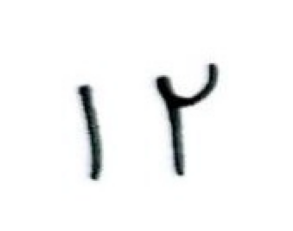

In [121]:
image_file_name = "12.1.jpg"
image = cv2.imread(image_file_name)
number_image = proprocess(image,is_single_digit=False)
number = get_digits(number_image)
print(number)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

## Section 7.2 : test 2 : 967

1/1 [==============================] - 0s 20ms/step
9


1/1 [==============================] - 0s 44ms/step
96
1/1 [==============================] - 0s 21ms/step
967
967


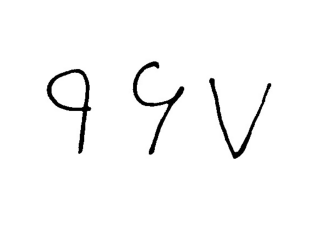

In [122]:
image_file_name = "967.jpg"
image = cv2.imread(image_file_name)
number_image = proprocess(image,is_single_digit=False)
number = get_digits(number_image)
print(number)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

## Section 7.3 : code in action.

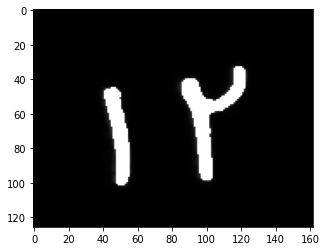

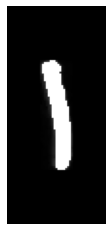

1/1 [==============================] - 0s 17ms/step
1


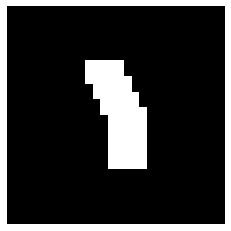

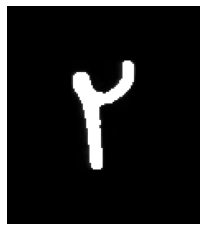

1/1 [==============================] - 0s 15ms/step
2


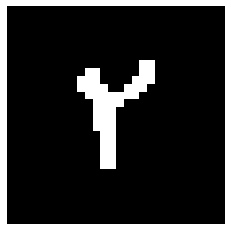

In [123]:



image_file_name = "12.1.jpg"
image = cv2.imread(image_file_name)
image = cv2.GaussianBlur(image, (1, 1), 0)
image = cv2.medianBlur(image, 3)
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        
threshold_value = 200
replacement_value = 0
mask = grayscale_image < threshold_value
        
grayscale_image[mask] = replacement_value

        


size = (2, 2)
shape = cv2.MORPH_RECT
kernel = cv2.getStructuringElement(shape, size)
min_image = cv2.erode(grayscale_image, kernel)

min_image =  255 - min_image
        
        

plt.imshow(min_image, cmap='gray')
plt.show()
_, binary = cv2.threshold(min_image, 40, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


for contour in contours:
    if cv2.contourArea(contour) >= 80:
        x, y, w, h = cv2.boundingRect(contour)

        cropped = min_image[y:y+h, x:x+w]
        
        height, width = cropped.shape
        cropped = cv2.copyMakeBorder(cropped, height//2, height//2, width, width, cv2.BORDER_CONSTANT)
        plt.imshow(cropped, cmap='gray')
        plt.axis('off')
        plt.show()
        cropped = cv2.resize(cropped, (28,28))
        _,cropped = cv2.threshold(cropped, 40, 255, cv2.THRESH_BINARY)
        flatten_image = cropped.flatten()
        flatten_image = flatten_image.reshape(1, -1)
        flatten_image = flatten_image.astype('float32') / 255
        flatten_image = flatten_image.reshape((28, 28, 1)) 
        predictions = CNN_model.predict(np.expand_dims(flatten_image, axis=0))
        print(np.argmax(predictions[0])) 
        plt.imshow(cropped, cmap='gray')
        plt.axis('off')
        plt.show()
